In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/healthcare-dataset/healthcare_dataset.csv


In [2]:
df = pd.read_csv("/kaggle/input/healthcare-dataset/healthcare_dataset.csv")

In [3]:
df.head(5)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


# EDA

In [4]:
numerical_columns = df.select_dtypes(include=["int64", "float64"])
categorical_columns = df.select_dtypes(include=["object"])

In [5]:
numerical_columns.describe()

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


It seems that Age and Billing would be the only numerical columns that would help modeling since room number doesn't convey any medical or clinical meaning. Hopefully, doctors at any hospital treat everyone equally regardless of their room number :)

In [6]:
categorical_columns.describe()

,Name,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Admission Type,Discharge Date,Medication,Test Results
count,55500,55500,55500,55500,55500,55500,55500,55500,55500,55500,55500,55500
unique,49992,2,8,6,1827,40341,39876,5,3,1856,5,3
top,DAvId muNoZ,Male,A-,Arthritis,2024-03-16,Michael Smith,LLC Smith,Cigna,Elective,2020-03-15,Lipitor,Abnormal
freq,3,27774,6969,9308,50,27,44,11249,18655,53,11140,18627


As stated by the provider of this dataset, we can treat this dataset as a Multi-class Classification problem to solve for the Test Results columns. 

In [7]:
df.groupby("Blood Type").size()

Blood Type
A+     6956
A-     6969
AB+    6947
AB-    6945
B+     6945
B-     6944
O+     6917
O-     6877
dtype: int64

In [8]:
grouped_df = df.groupby(df.columns.tolist(), as_index=False).size()
grouped_df.loc[grouped_df["size"] > 1].head(3)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,size
50,ABIgaIL YOung,41,Female,O+,Hypertension,2022-12-15,Edward Kramer,Moore-Mcdaniel,UnitedHealthcare,1983.568297,192,Elective,2023-01-13,Ibuprofen,Normal,2
195,ALIcia taYLoR,78,Male,O+,Asthma,2022-09-18,Dawn Burton,Wright LLC,Aetna,31465.274979,149,Elective,2022-10-15,Aspirin,Inconclusive,2
563,AMy GREEN,79,Female,B+,Obesity,2021-03-30,Brett Johnson,Taylor-Williamson,UnitedHealthcare,23402.358491,249,Elective,2021-04-27,Penicillin,Abnormal,2


In [9]:
df_deduped = df.drop_duplicates()
df_deduped.loc[df_deduped["Name"] == "ABIgaIL YOung"]

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
42407,ABIgaIL YOung,41,Female,O+,Hypertension,2022-12-15,Edward Kramer,Moore-Mcdaniel,UnitedHealthcare,1983.568297,192,Elective,2023-01-13,Ibuprofen,Normal


In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.loc[df["Name"] == "ABIgaIL YOung"]

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
42407,ABIgaIL YOung,41,Female,O+,Hypertension,2022-12-15,Edward Kramer,Moore-Mcdaniel,UnitedHealthcare,1983.568297,192,Elective,2023-01-13,Ibuprofen,Normal


In [12]:
df.duplicated().sum()

0

# Data Visualizations

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
df.groupby("Age").size().head(3)

Age
13    14
14    18
15    28
dtype: int64

In [15]:
df.groupby("Age").size().reset_index(name="Count").head(10)

,Age,Count
0,13,14
1,14,18
2,15,28
3,16,24
4,17,32
5,18,770
6,19,791
7,20,744
8,21,817
9,22,810


In [16]:
df.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

In [17]:
test_date_one = pd.to_datetime(df["Date of Admission"])
test_date_two = pd.to_datetime(df["Discharge Date"])

print(test_date_two - test_date_one)

0        2 days
1        6 days
2       15 days
3       30 days
4       20 days
          ...  
55495   30 days
55496    9 days
55497   28 days
55498    6 days
55499   27 days
Length: 54966, dtype: timedelta64[ns]


In [18]:
df_copy = df.copy()
df_copy["Date of Admission"] = pd.to_datetime(df_copy["Date of Admission"])
df_copy["Discharge Date"] = pd.to_datetime(df_copy["Discharge Date"])
df_copy["Days in Hospital"] = (df_copy["Discharge Date"] - df_copy["Date of Admission"])
df_copy["Days in Hospital"] = df_copy["Days in Hospital"].dt.days

df_copy.head(3)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Days in Hospital
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal,2
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive,6
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal,15


In [19]:
# Drop columns on axis=1 (columns)
df_copy.drop(["Name", "Doctor", "Date of Admission", "Discharge Date"], axis=1, inplace=True)
cols_to_graph = [
    "Age",
    "Gender",
    "Blood Type",
    "Medical Condition",
    "Insurance Provider",
    "Admission Type",
    "Medication",
    "Test Results",
    "Days in Hospital"
]

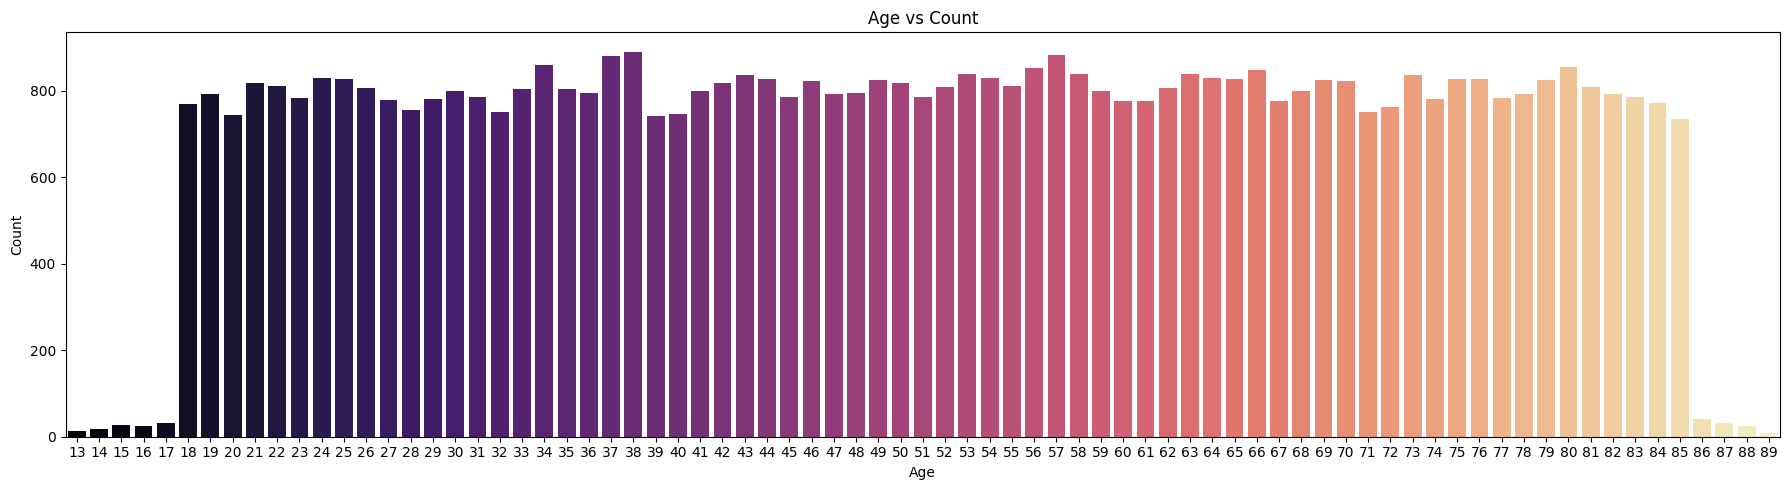

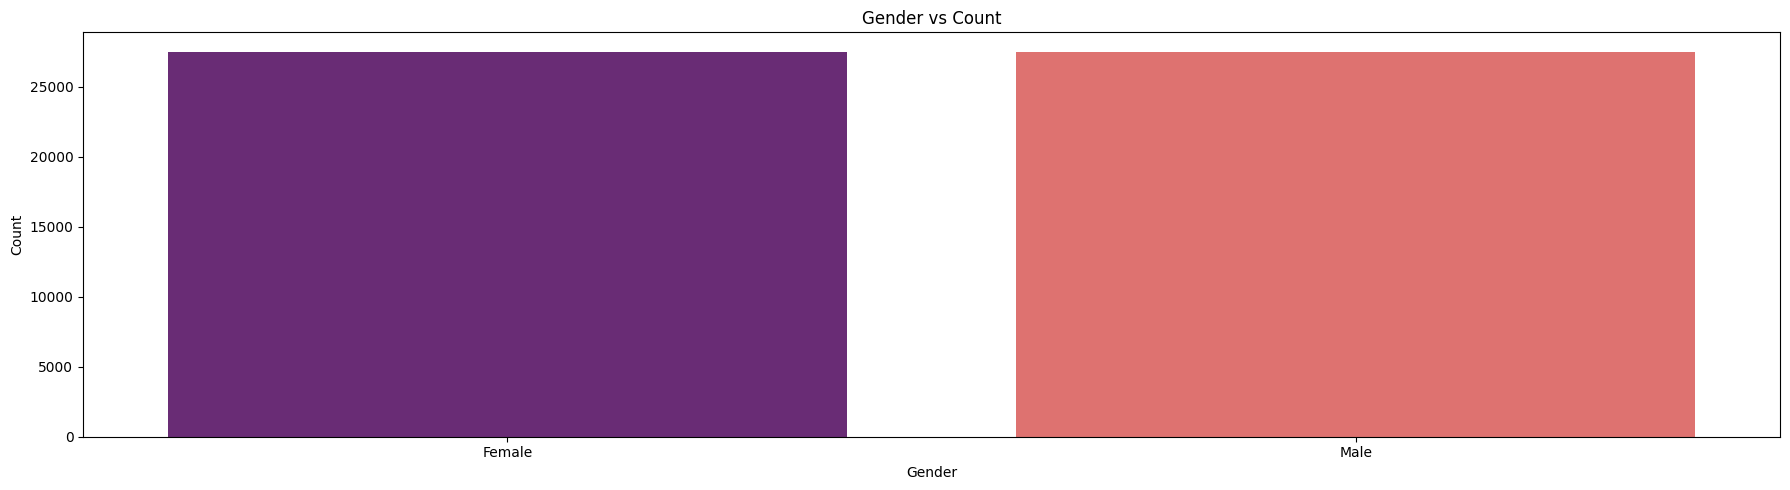

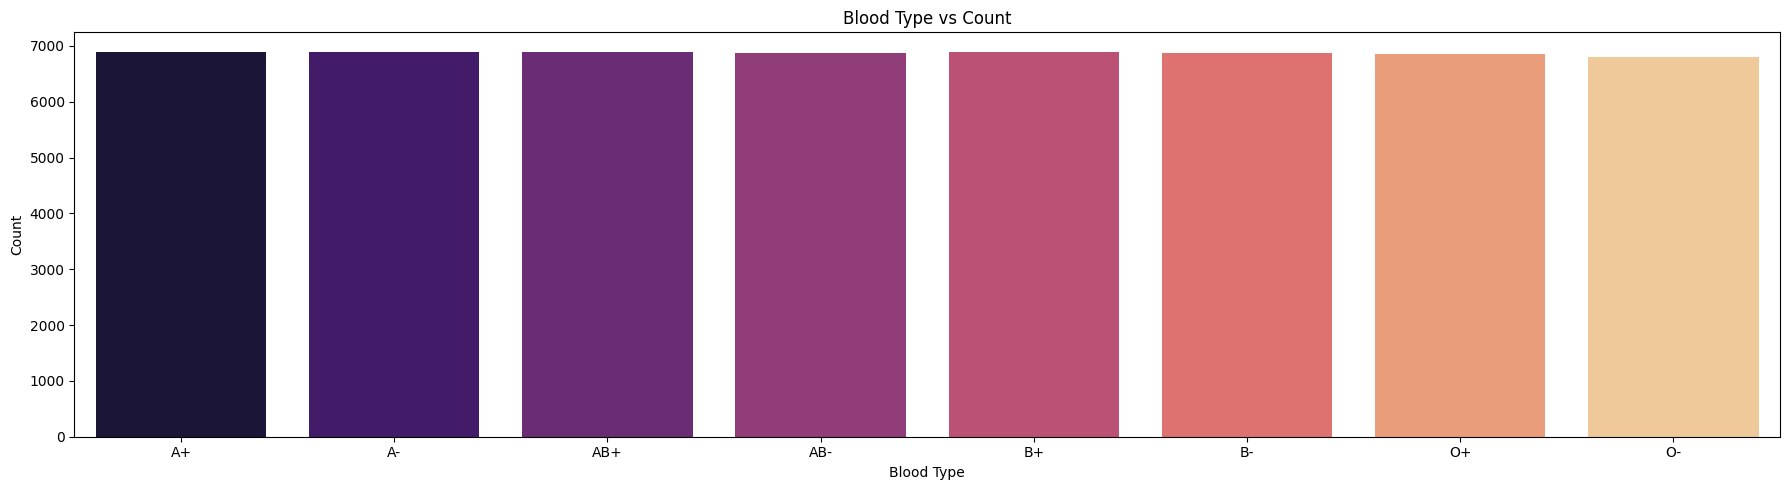

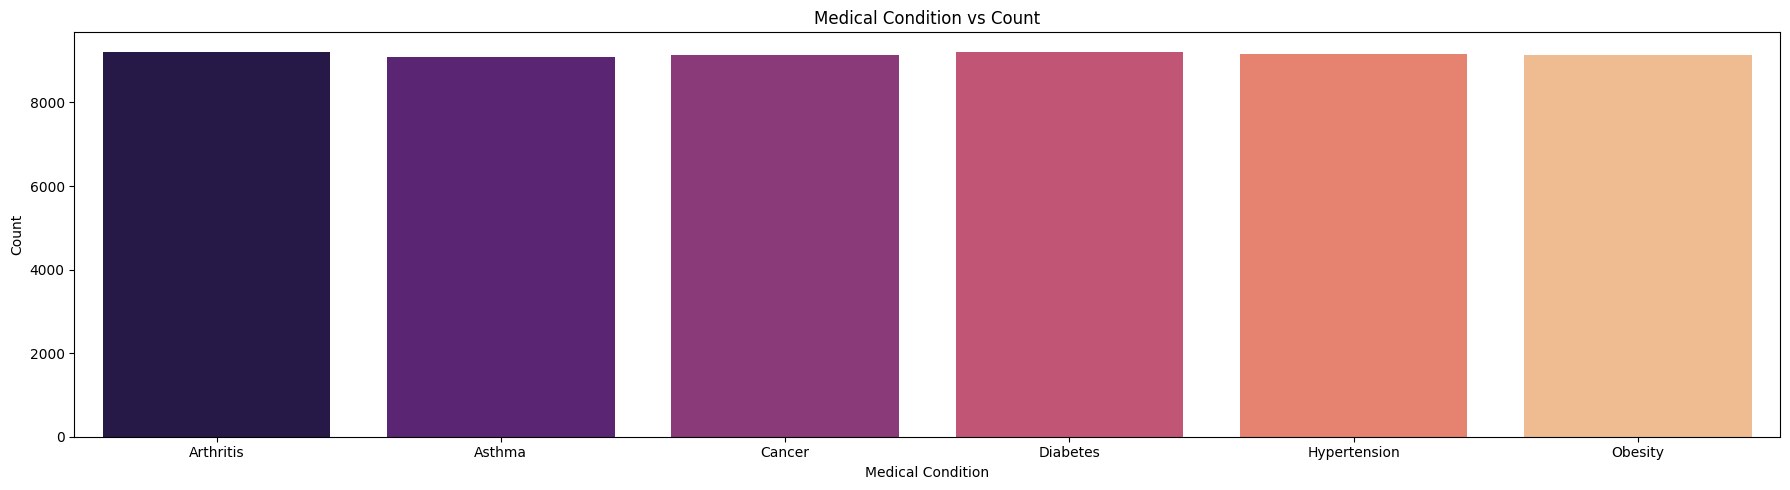

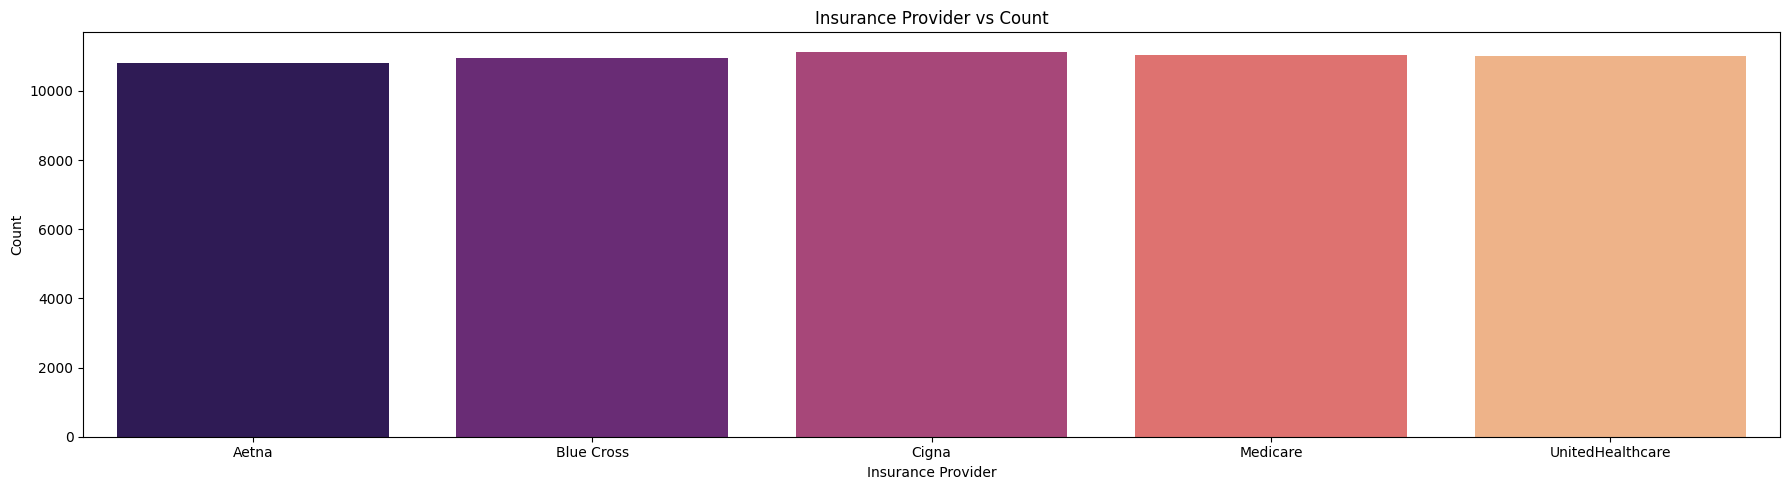

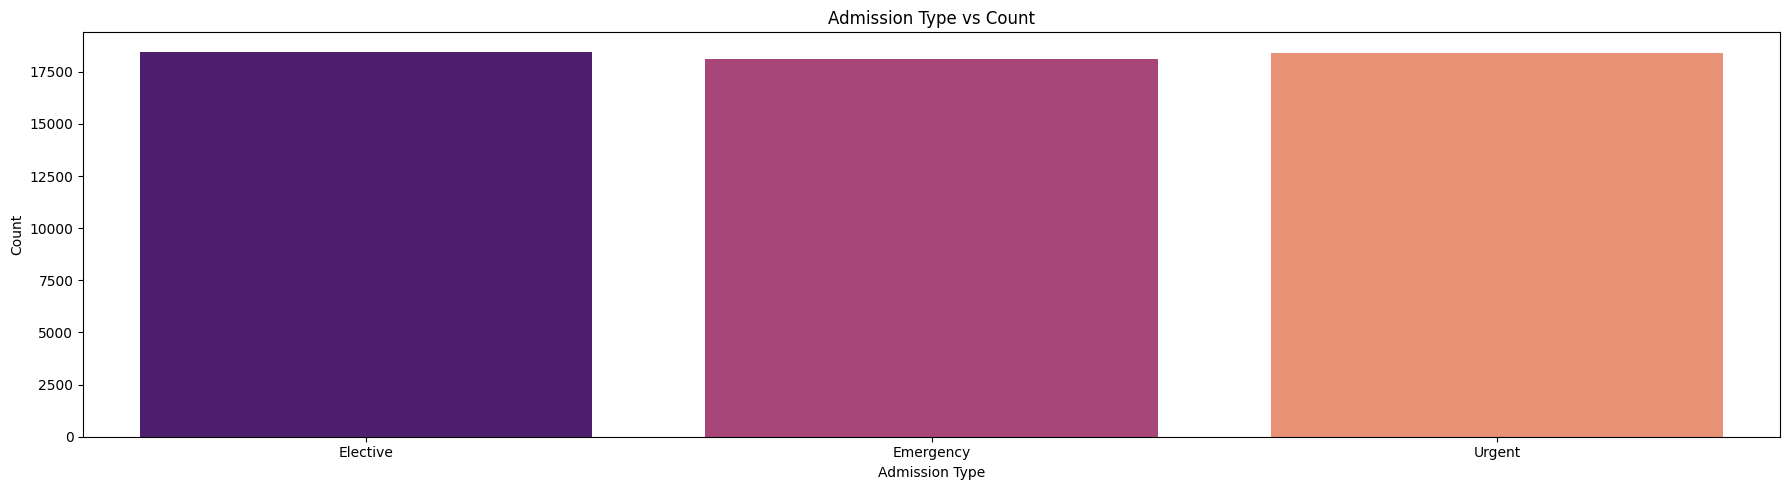

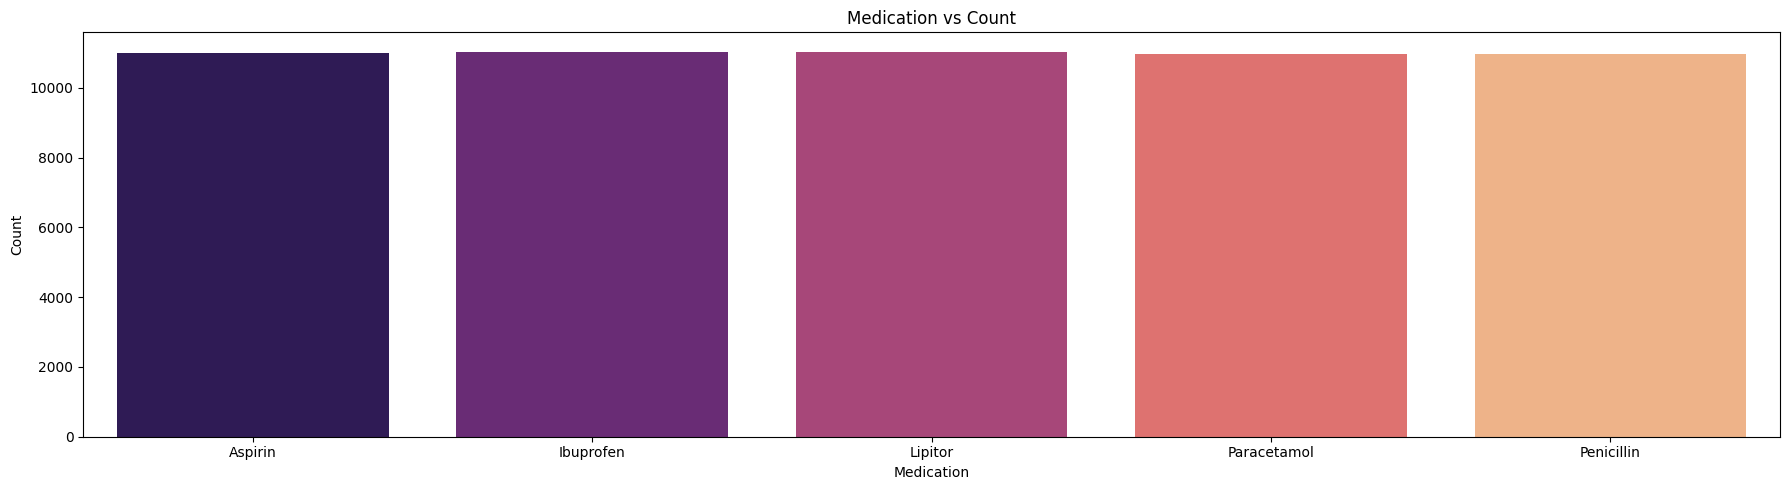

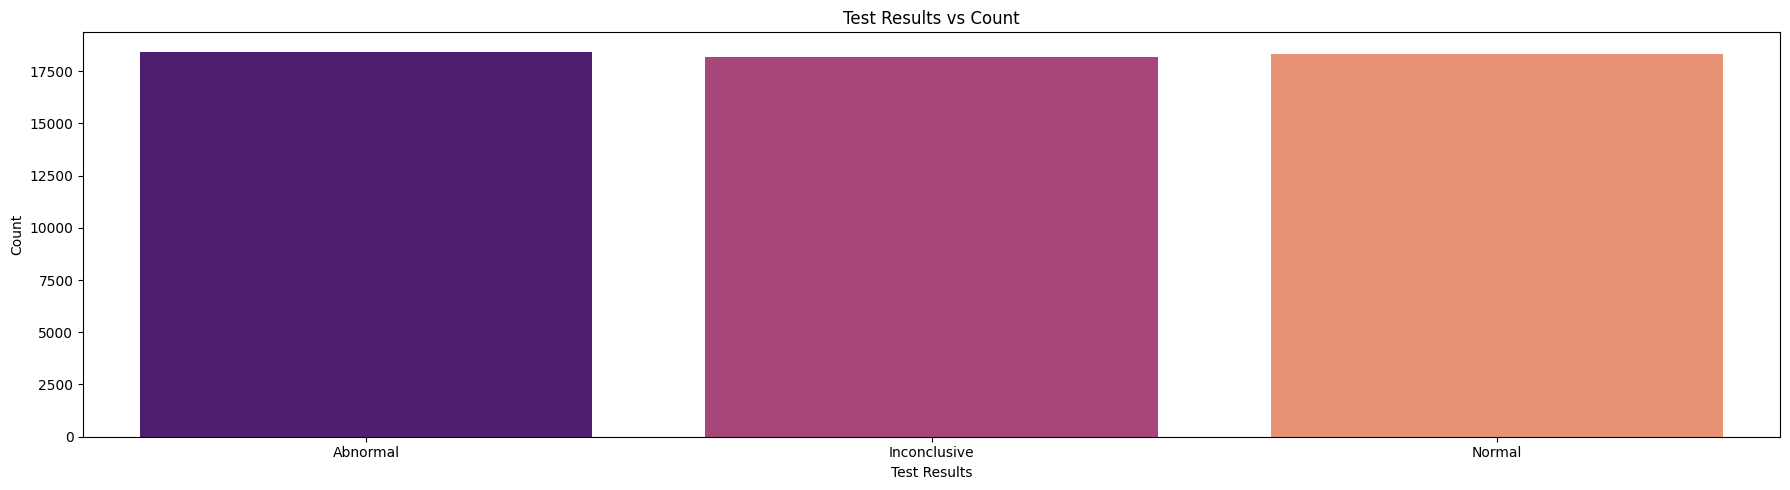

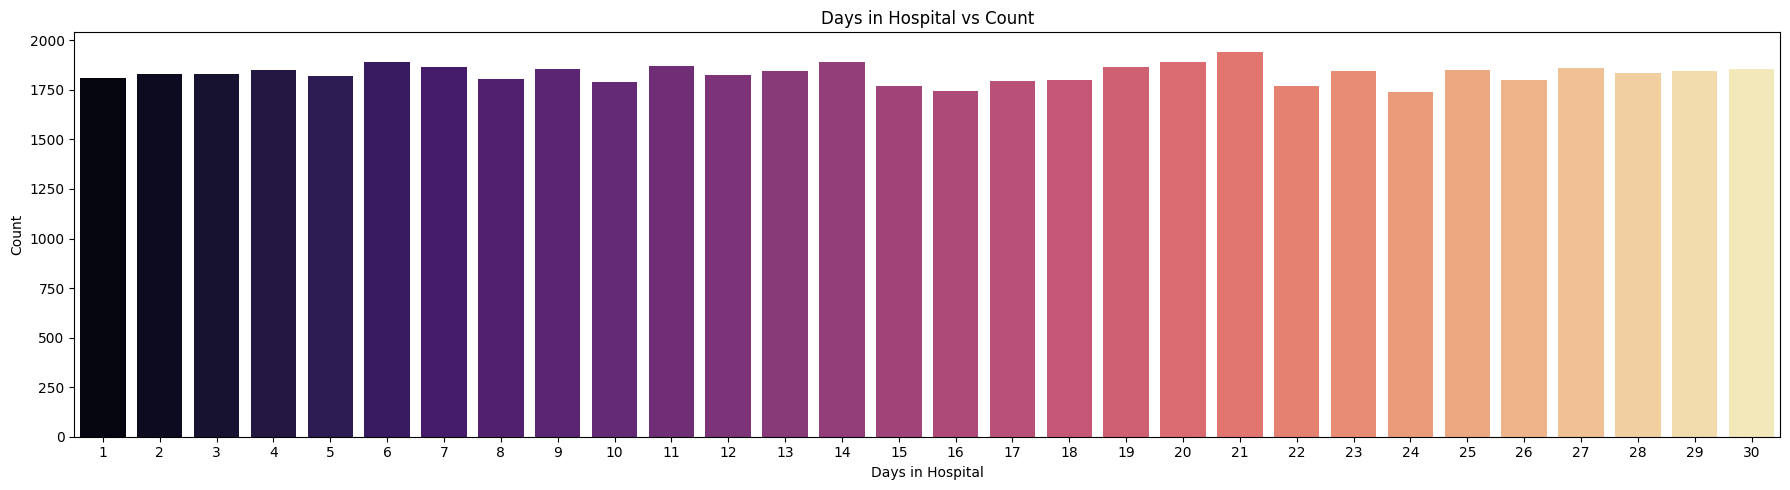

In [20]:
for col in cols_to_graph:
    plt.figure(figsize=(18,5))
    grouped_df = df_copy.groupby(col).size().reset_index(name="Count")
    sns.barplot(data=grouped_df, x=col, y="Count", palette="magma")
    plt.title(f"{col} vs Count")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

In [21]:
set(df_copy.columns.tolist()) - set(cols_to_graph)

{'Billing Amount', 'Hospital', 'Room Number'}

The graphs above seem to be evenly distributed, with the exception of Age whose lower tail ranges from 13-17 and the upper tail ranges from 86-89.

To analyze/model
- Expenses by hospital
- Expenses by gender
- Expenses by number of days in hospital
- number of days in hospital based on medical condition
- Medical condition expenses and classification/clustering

Columns:
- "Age",
- "Gender",
- "Blood Type",
- "Medical Condition",
- "Insurance Provider",
- "Admission Type",
- "Medication",
- "Test Results",
- "Days in Hospital",
- "Billing Amount",
- "Hospital",
- "Room Number"

# Modeling

In [22]:
# Preprocess categorical variables
from sklearn.preprocessing import LabelEncoder

# Split data into train and test data
from sklearn.model_selection import train_test_split

# Models to try
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Measurements
from sklearn.metrics import mean_absolute_error